In [1]:
using LinearAlgebra

In [2]:
using Plots
using LaTeXStrings #Latex Syntax for Plotting

In [3]:
using ITensors
# ITensors.compile()

In [4]:
using DelimitedFiles #Save .txt

In [5]:
using Base.Threads #Parallelism https://janv.people.uic.edu/mcs320/mcs320notes/lec39.html
nthreads() #Number of logical processors of this kernel. I run this command in Julia terminal before: installkernel("Julia (16 threads)", env = Dict("JULIA_NUM_THREADS"=>"16"))

1

Article: https://arxiv.org/abs/cond-mat/0409692

$$ H = \sum_{j = 1}^{N - 1} J_{n} ( S_{j}^{x}S_{j+1}^{x} + S_{j}^{y}S_{j+1}^{y} + J_{z} S_{j}^{z}S_{j+1}^{z} )$$

Dimerized Model when $J_{z} = const$ and $J_{n} = [1 + (-1)^n \delta]$

**XX Model when $J_{z} = \delta = 0 \Rightarrow J_{n} = 1$**

In [6]:
function Create_MPO(N, Jn, Jz) # Make N S=1/2 spin indices 
    sites = siteinds("S=1/2",N) 
    # Input the operator terms 
    
    os = OpSum() 
    for i=1:N-1 
        os += Jn,"Sx",i,"Sx",i+1 
        os += Jn,"Sy",i,"Sy",i+1 
        os += Jn*Jz,"Sz",i,"Sz",i+1 
    end 
    
    # Convert these terms to an MPO 
    H = MPO(os,sites)
    return H, sites
end

Create_MPO (generic function with 1 method)

In [9]:
linkdims(H)

99-element Vector{Int64}:
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5
 ⋮
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5

In [7]:
N = 100

H, sites = Create_MPO(100, 1, 2)

(MPO
[1] ((dim=5|id=912|"Link,l=1"), (dim=2|id=550|"S=1/2,Site,n=1")', (dim=2|id=550|"S=1/2,Site,n=1"))
[2] ((dim=5|id=912|"Link,l=1"), (dim=5|id=275|"Link,l=2"), (dim=2|id=517|"S=1/2,Site,n=2")', (dim=2|id=517|"S=1/2,Site,n=2"))
[3] ((dim=5|id=275|"Link,l=2"), (dim=5|id=20|"Link,l=3"), (dim=2|id=925|"S=1/2,Site,n=3")', (dim=2|id=925|"S=1/2,Site,n=3"))
[4] ((dim=5|id=20|"Link,l=3"), (dim=5|id=517|"Link,l=4"), (dim=2|id=140|"S=1/2,Site,n=4")', (dim=2|id=140|"S=1/2,Site,n=4"))
[5] ((dim=5|id=517|"Link,l=4"), (dim=5|id=292|"Link,l=5"), (dim=2|id=425|"S=1/2,Site,n=5")', (dim=2|id=425|"S=1/2,Site,n=5"))
[6] ((dim=5|id=292|"Link,l=5"), (dim=5|id=653|"Link,l=6"), (dim=2|id=847|"S=1/2,Site,n=6")', (dim=2|id=847|"S=1/2,Site,n=6"))
[7] ((dim=5|id=653|"Link,l=6"), (dim=5|id=692|"Link,l=7"), (dim=2|id=77|"S=1/2,Site,n=7")', (dim=2|id=77|"S=1/2,Site,n=7"))
[8] ((dim=5|id=692|"Link,l=7"), (dim=5|id=286|"Link,l=8"), (dim=2|id=412|"S=1/2,Site,n=8")', (dim=2|id=412|"S=1/2,Site,n=8"))
[9] ((dim=5|id=286

In [8]:
H

MPO
[1] ((dim=5|id=912|"Link,l=1"), (dim=2|id=550|"S=1/2,Site,n=1")', (dim=2|id=550|"S=1/2,Site,n=1"))
[2] ((dim=5|id=912|"Link,l=1"), (dim=5|id=275|"Link,l=2"), (dim=2|id=517|"S=1/2,Site,n=2")', (dim=2|id=517|"S=1/2,Site,n=2"))
[3] ((dim=5|id=275|"Link,l=2"), (dim=5|id=20|"Link,l=3"), (dim=2|id=925|"S=1/2,Site,n=3")', (dim=2|id=925|"S=1/2,Site,n=3"))
[4] ((dim=5|id=20|"Link,l=3"), (dim=5|id=517|"Link,l=4"), (dim=2|id=140|"S=1/2,Site,n=4")', (dim=2|id=140|"S=1/2,Site,n=4"))
[5] ((dim=5|id=517|"Link,l=4"), (dim=5|id=292|"Link,l=5"), (dim=2|id=425|"S=1/2,Site,n=5")', (dim=2|id=425|"S=1/2,Site,n=5"))
[6] ((dim=5|id=292|"Link,l=5"), (dim=5|id=653|"Link,l=6"), (dim=2|id=847|"S=1/2,Site,n=6")', (dim=2|id=847|"S=1/2,Site,n=6"))
[7] ((dim=5|id=653|"Link,l=6"), (dim=5|id=692|"Link,l=7"), (dim=2|id=77|"S=1/2,Site,n=7")', (dim=2|id=77|"S=1/2,Site,n=7"))
[8] ((dim=5|id=692|"Link,l=7"), (dim=5|id=286|"Link,l=8"), (dim=2|id=412|"S=1/2,Site,n=8")', (dim=2|id=412|"S=1/2,Site,n=8"))
[9] ((dim=5|id=286|

$$ | init \rangle = |\uparrow \uparrow  ... \downarrow \downarrow \rangle$$

In [8]:
Psi_0 = MPS(sites, n -> n <= N/2 ? "Up" : "Dn") #If  n <= N/2 then "Up", else "Dn"

MPS
[1] ((dim=2|id=493|"S=1/2,Site,n=1"), (dim=1|id=996|"Link,l=1"))
[2] ((dim=1|id=996|"Link,l=1"), (dim=2|id=39|"S=1/2,Site,n=2"), (dim=1|id=617|"Link,l=2"))
[3] ((dim=1|id=617|"Link,l=2"), (dim=2|id=867|"S=1/2,Site,n=3"), (dim=1|id=421|"Link,l=3"))
[4] ((dim=1|id=421|"Link,l=3"), (dim=2|id=394|"S=1/2,Site,n=4"), (dim=1|id=160|"Link,l=4"))
[5] ((dim=1|id=160|"Link,l=4"), (dim=2|id=743|"S=1/2,Site,n=5"), (dim=1|id=403|"Link,l=5"))
[6] ((dim=1|id=403|"Link,l=5"), (dim=2|id=714|"S=1/2,Site,n=6"), (dim=1|id=392|"Link,l=6"))
[7] ((dim=1|id=392|"Link,l=6"), (dim=2|id=192|"S=1/2,Site,n=7"), (dim=1|id=458|"Link,l=7"))
[8] ((dim=1|id=458|"Link,l=7"), (dim=2|id=26|"S=1/2,Site,n=8"), (dim=1|id=946|"Link,l=8"))
[9] ((dim=1|id=946|"Link,l=8"), (dim=2|id=699|"S=1/2,Site,n=9"), (dim=1|id=742|"Link,l=9"))
[10] ((dim=1|id=742|"Link,l=9"), (dim=2|id=36|"S=1/2,Site,n=10"), (dim=1|id=571|"Link,l=10"))
[11] ((dim=1|id=571|"Link,l=10"), (dim=2|id=423|"S=1/2,Site,n=11"), (dim=1|id=157|"Link,l=11"))
[12] ((

**Figure 9:**

In [9]:
function Von_Neumann_Entropy(psi, site_to_cut) # https://itensor.discourse.group/t/question-about-calculating-entanglement-entropy-of-a-mps/240
  sites = siteinds(psi)  
  orthogonalize!(psi, site_to_cut) #https://itensor.discourse.group/t/the-use-of-orthogonalize/56, orthogonalize creates the mixed MPS centered in side_to_cut.
  U,S,V = svd(psi[site_to_cut], (linkind(psi, site_to_cut-1), sites[site_to_cut]))

  SvN = 0.0
  for n in 1:dim(S, 1)
    p = S[n,n]^2 #Schmidt coefficient
    SvN -= p * log2(p)
  end
  return SvN
end

function TEBD_Time_Evolution_Von_Neumann_Entropy(t, Psi_0, Jn, Jz, site_inds)
    #|Ψ(t)> = exp(-itH)|Ψ(0)>

    N = length(Psi_0)

    maxdim = 20 #Each that apply is executed an SVD is also executed, maxdim is the maximum of the dimension that we will use from the SVD.
    cutoff = 1E-11 #the cutoff value for truncating the density matrix eigenvalues. https://itensor.github.io/ITensors.jl/dev/ContractionSequenceOptimization.html#NDTensors.contract
    dt = 0.1
    
    s = site_inds
    
    # Make gates (1,2),(2,3),(3,4),...
    Evolution_Gates = ITensor[]    

    for j in 1:(N - 1)
        
        s1 = s[j]
        s2 = s[j + 1]
        hj = Jn*Jz*op("Sz", s1)*op("Sz", s2) + Jn*op("Sx", s1)*op("Sx", s2) + Jn*op("Sy", s1)*op("Sy", s2)
        
    U = exp(-im * dt/ 2 * hj)
    push!(Evolution_Gates, U)
    end

    append!(Evolution_Gates, reverse(Evolution_Gates))

    Psi_t = Psi_0

    SVN = [Von_Neumann_Entropy(Psi_t, trunc(Int, N/2))]
    Times = [0.0]
    
    for time in dt:dt:t
        Psi_t = apply(Evolution_Gates, Psi_t; cutoff, maxdim)
        normalize!(Psi_t)

        append!(Times, time)
        append!(SVN, Von_Neumann_Entropy(Psi_t, trunc(Int, N/2)))
    end
    
    return SVN, Times
end

TEBD_Time_Evolution_Von_Neumann_Entropy (generic function with 1 method)

In [14]:
N = 100

H_XX, sites = Create_MPO(N, 1, 0) #XX Model
Psi_0 = MPS(sites, n -> n <= N/2 ? "Up" : "Dn") #If  n <= N/2 then "Up", else "Dn"

T = 50 

@time begin 
SVN, Times = TEBD_Time_Evolution_Von_Neumann_Entropy(T, Psi_0, 1, 0, sites) #Jn = 1, Jz = 0
end

121.775711 seconds (202.80 M allocations: 75.696 GiB, 11.19% gc time)


([0.0, 0.025180398056475213, 0.08044899812478092, 0.15386330726657635, 0.2386310785257932, 0.3297486893695332, 0.42322826508132527, 0.5158001282625082, 0.6047751780580728, 0.6879733301338989  …  1.6319953636300046, 1.630995020600228, 1.6297151780335069, 1.62822600445746, 1.6266058115009598, 1.624937952470962, 1.6233075339211829, 1.6217980661603728, 1.6204881817866101, 1.619448549476171], [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9  …  49.1, 49.2, 49.3, 49.4, 49.5, 49.6, 49.7, 49.8, 49.9, 50.0])

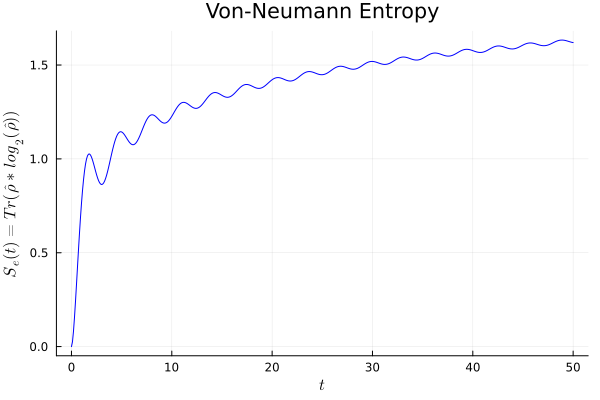

In [16]:
plot(Times, SVN, color = "blue", label = false)

xlabel!(L"t")
ylabel!(L"S_{e}(t) = Tr(\hat{\rho} *log_{2}(\hat{\rho}))")
title!("Von-Neumann Entropy")

**Figure 11:**

In [17]:
function TEBD_Time_Evolution_Expected_Value_Sz(t, Psi_0, Jn, Jz, site_inds)
    #|Ψ(t)> = exp(-itH)|Ψ(0)>

    N = length(Psi_0)

    maxdim = 20 #Each that apply is executed an SVD is also executed, maxdim is the maximum of the dimension that we will use from the SVD.
    cutoff = 1E-11 #the cutoff value for truncating the density matrix eigenvalues. https://itensor.github.io/ITensors.jl/dev/ContractionSequenceOptimization.html#NDTensors.contract
    dt = 0.1
    
    s = site_inds
    
    # Make gates (1,2),(2,3),(3,4),...
    Evolution_Gates = ITensor[]    

    for j in 1:(N - 1)
        
        s1 = s[j]
        s2 = s[j + 1]
        hj = Jn*Jz*op("Sz", s1)*op("Sz", s2) + Jn*op("Sx", s1)*op("Sx", s2) + Jn*op("Sy", s1)*op("Sy", s2)
        
    U = exp(-im * dt/ 2 * hj)
    push!(Evolution_Gates, U)
    end

    append!(Evolution_Gates, reverse(Evolution_Gates))

    Psi_t = Psi_0
    
    Expected_Values = zeros((N, trunc(Int, t/0.5) + 1)) #Each column contain the expected value of Sz for all sites for time = ncolum*(dt - 1)
    Expected_Values[:, 1] = expect(Psi_t,"Sz")    
    Times = [0.0]
    
    for time in dt:dt:t
        Psi_t = apply(Evolution_Gates, Psi_t; cutoff, maxdim)
        normalize!(Psi_t)

        if time % 0.5 == 0
            append!(Times, time)
            Expected_Values[:, trunc(Int, time/0.5 + 1)] = expect(Psi_t,"Sz")
        end
    end
    
    return Expected_Values, Times
    
end

TEBD_Time_Evolution_Expected_Value_Sz (generic function with 1 method)

In [22]:
N = 200

H_XX, sites = Create_MPO(N, 1, 0) #XX Model
Psi_0 = MPS(sites, n -> n <= N/2 ? "Up" : "Dn") #If  n <= N/2 then "Up", else "Dn"

T = 70 

@time begin 
Expected_Values, Times = TEBD_Time_Evolution_Expected_Value_Sz(T, Psi_0, 1, 0, sites) #Jn = 1, Jz = 0
end

311.613260 seconds (700.42 M allocations: 216.663 GiB, 13.83% gc time)


([0.5 0.5000000000000001 … 0.5000000000000001 0.5; 0.5 0.4999999999999997 … 0.5 0.5; … ; -0.5 -0.4999999999999998 … -0.4999999999999992 -0.5000000000000007; -0.5 -0.4999999999999998 … -0.4999999999999992 -0.5000000000000006], [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5  …  65.5, 66.0, 66.5, 67.0, 67.5, 68.0, 68.5, 69.0, 69.5, 70.0])

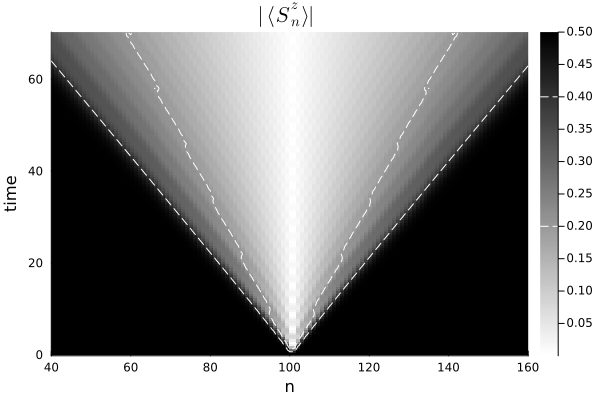

In [24]:
heatmap(1:N, Times, abs.(transpose(Expected_Values)), c=cgrad([:white, :black]), xlabel="n", ylabel="time", title= L"| \langle S^{z}_{n} \rangle |", xlim = (40,160)) #colorbar_title = L"| \langle S^{z}_{n} \rangle |"
contour!(1:N, Times, abs.(transpose(Expected_Values)), levels= [0.2,0.4], color = :white, linestyle = :dash)

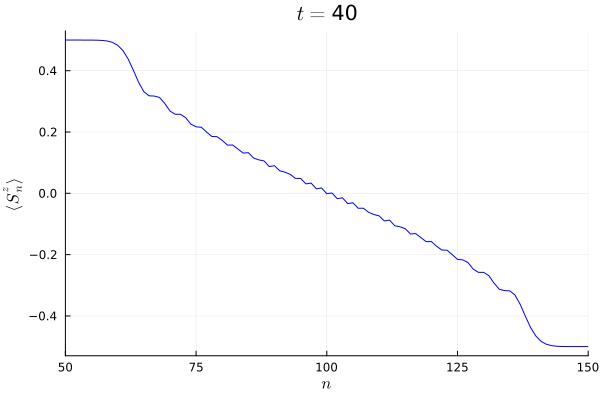

In [32]:
time = 40
plot(1:N, Expected_Values[:, trunc(Int, time/0.5 + 1)], color = "blue", label = false, xlim = (50,150))

xlabel!(L"n")
ylabel!(L"\langle S^{z}_{n} \rangle")
title!(L"t = "*string(time))

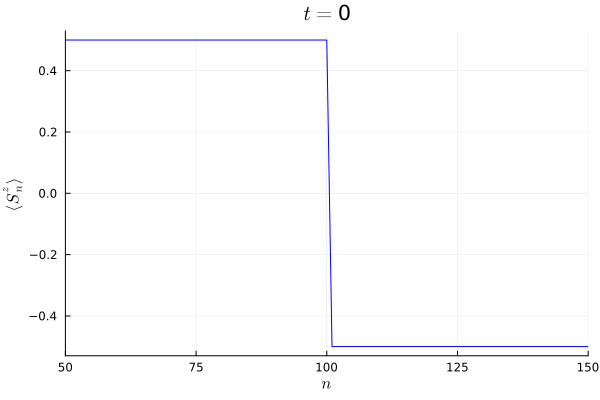

attempt to save state beyond implementation limit


In [46]:
time = 0
plot(1:N, Expected_Values[:, trunc(Int, time/0.5 + 1)], color = "blue", label = false, xlim = (50,150))

xlabel!(L"n")
ylabel!(L"\langle S^{z}_{n} \rangle")
title!(L"t = "*string(time))

**Figure 12:**

In [9]:
Jn = 1
Jz_list = [0, 0.3, 0.6, 0.9, 1.0, 1.1]

6-element Vector{Float64}:
 0.0
 0.3
 0.6
 0.9
 1.0
 1.1

In [65]:
#Test using Multi-Threading

N = 200

H_XX, sites = Create_MPO(N, 1, 0) #XX Model
Psi_0 = MPS(sites, n -> n <= N/2 ? "Up" : "Dn") #If  n <= N/2 then "Up", else "Dn"

T = 10 # Aprox 46 seconds

@time begin
@threads for i=1:min(nthreads(), length(Jz_list)) #Multi-Threading
    Jz = Jz_list[i]
    # Expected_Values, Times = TEBD_Time_Evolution_Expected_Value_Sz(T, Psi_0, 1, Jz, sites) #Jn = 1, Jz = 0
    # writedlm("txt_files/Fig12_Expected_Values_Jz_"*string(Jz)*".txt", Expected_Values)   
    # writedlm("txt_files/Fig12_Times_Jz_"*string(Jz)*".txt", Times)   
end
end

 46.623037 seconds (600.88 M allocations: 142.771 GiB, 31.09% gc time, 0.52% compilation time)


In [298]:
N = 200

H_XX, sites = Create_MPO(N, 1, 0) #XX Model
Psi_0 = MPS(sites, n -> n <= N/2 ? "Up" : "Dn") #If  n <= N/2 then "Up", else "Dn"

Jn = 1
Jz_list = [0, 0.3, 0.6, 0.9, 1.0, 1.1]

T = 70 

@time begin
@threads for i=1:min(nthreads(), length(Jz_list)) #Multi-Threading
    Jz = Jz_list[i]
    Expected_Values, Times = TEBD_Time_Evolution_Expected_Value_Sz(T, Psi_0, Jn, Jz, sites) 
    writedlm("txt_files/Fig12_Expected_Values_Jz_"*string(Jz)*".txt", Expected_Values)   
    writedlm("txt_files/Fig12_Times_Jz_"*string(Jz)*".txt", Times)   
end
end

502.759556 seconds (4.20 G allocations: 1.238 TiB, 35.65% gc time, 0.05% compilation time)


In [99]:
cgrad([:white, :black], [0, 1])

In [127]:
cgrad([:white, :black], [0.9999,1])

In [101]:
cgrad([:white, :black], [0.1, 0.2])

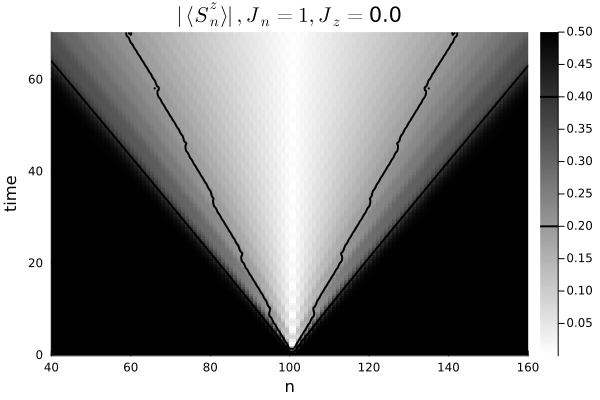

In [299]:
Jz=Jz_list[1]
Expected_Values = readdlm("txt_files/Fig12_Expected_Values_Jz_"*string(Jz)*".txt")
heatmap(1:N, 0.0:0.5:70, abs.(transpose(Expected_Values)), c=cgrad([:white, :black], [0, 1]), xlabel="n", ylabel="time", title= L"| \langle S^{z}_{n} \rangle |, J_{n} = 1, J_{z} ="*string(Jz), xlim = (40,160)) #colorbar_title = L"| \langle S^{z}_{n} \rangle |"
contour!(1:N, 0.0:0.5:70, abs.(transpose(Expected_Values)), levels= [0.2,0.4], color = :black, linestyle = :solid, width = 2)

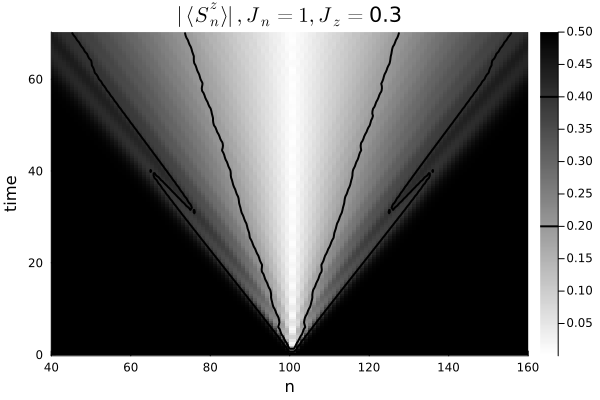

In [300]:
Jz=Jz_list[2]
Expected_Values = readdlm("txt_files/Fig12_Expected_Values_Jz_"*string(Jz)*".txt")
heatmap(1:N, 0.0:0.5:70, abs.(transpose(Expected_Values)), c=cgrad([:white, :black], [0, 1]), xlabel="n", ylabel="time", title= L"| \langle S^{z}_{n} \rangle |, J_{n} = 1, J_{z} ="*string(Jz), xlim = (40,160)) #colorbar_title = L"| \langle S^{z}_{n} \rangle |"
contour!(1:N, 0.0:0.5:70, abs.(transpose(Expected_Values)), levels= [0.2,0.4], color = :black, linestyle = :solid, width = 2)

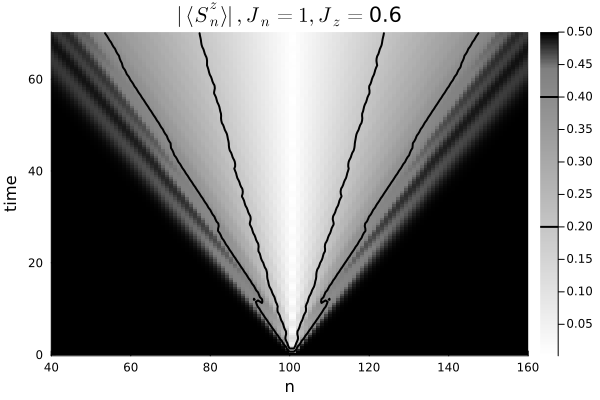

In [301]:
Jz=Jz_list[3]
Expected_Values = readdlm("txt_files/Fig12_Expected_Values_Jz_"*string(Jz)*".txt")
heatmap(1:N, 0.0:0.5:70, abs.(transpose(Expected_Values)), c= cgrad([:white, :black], [0, 0.89]) , xlabel="n", ylabel="time", title= L"| \langle S^{z}_{n} \rangle |, J_{n} = 1, J_{z} ="*string(Jz), xlim = (40,160)) #colorbar_title = L"| \langle S^{z}_{n} \rangle |"
contour!(1:N, 0.0:0.5:70, abs.(transpose(Expected_Values)), levels= [0.2,0.4], color = :black, linestyle = :solid, width = 2)

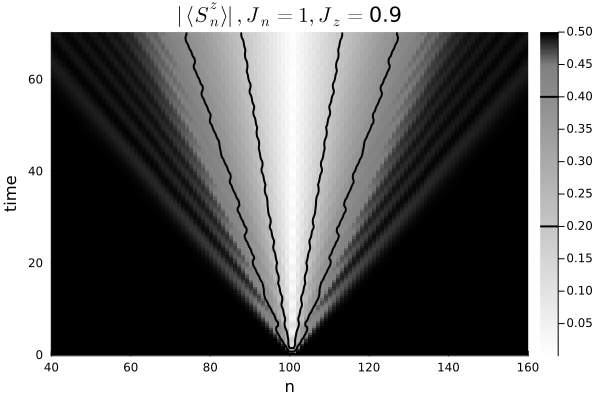

In [302]:
Jz=Jz_list[4]
Expected_Values = readdlm("txt_files/Fig12_Expected_Values_Jz_"*string(Jz)*".txt")
heatmap(1:N, 0.0:0.5:70, abs.(transpose(Expected_Values)), c=cgrad([:white, :black], [0, 0.9]), xlabel="n", ylabel="time", title= L"| \langle S^{z}_{n} \rangle |, J_{n} = 1, J_{z} ="*string(Jz), xlim = (40,160)) #colorbar_title = L"| \langle S^{z}_{n} \rangle |"
contour!(1:N, 0.0:0.5:70, abs.(transpose(Expected_Values)), levels= [0.2,0.4], color = :black, linestyle = :solid, width = 2)

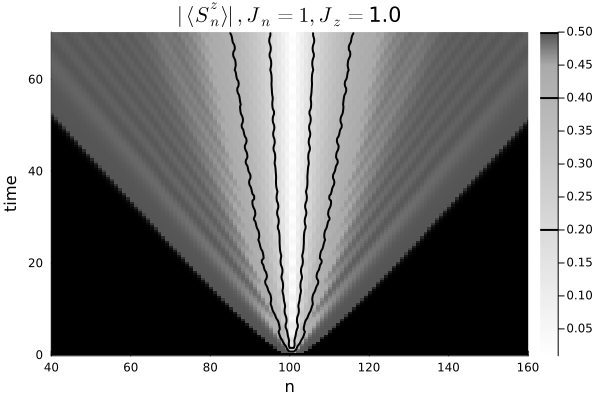

In [303]:
Jz=Jz_list[5]
Expected_Values = readdlm("txt_files/Fig12_Expected_Values_Jz_"*string(Jz)*".txt")
heatmap(1:N, 0.0:0.5:70, abs.(transpose(Expected_Values)), c=cgrad([:white, :gray, :black], [0, 0.9,0.99999]), xlabel="n", ylabel="time", title= L"| \langle S^{z}_{n} \rangle |, J_{n} = 1, J_{z} ="*string(Jz), xlim = (40,160)) #colorbar_title = L"| \langle S^{z}_{n} \rangle |"
contour!(1:N, 0.0:0.5:70, abs.(transpose(Expected_Values)), levels= [0.2,0.4], color = :black, linestyle = :solid, width = 2)

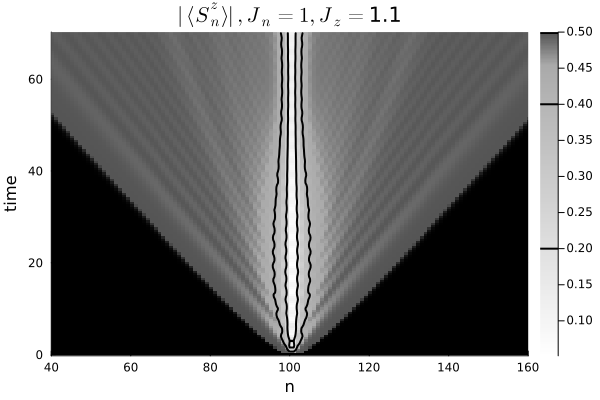

In [304]:
Jz=Jz_list[6]
Expected_Values = readdlm("txt_files/Fig12_Expected_Values_Jz_"*string(Jz)*".txt")
heatmap(1:N, 0.0:0.5:70, abs.(transpose(Expected_Values)), c=cgrad([:white, :gray, :black], [0, 0.9,0.99999]), xlabel="n", ylabel="time", title= L"| \langle S^{z}_{n} \rangle |, J_{n} = 1, J_{z} ="*string(Jz), xlim = (40,160)) #colorbar_title = L"| \langle S^{z}_{n} \rangle |"
contour!(1:N, 0.0:0.5:70, abs.(transpose(Expected_Values)), levels= [0.2,0.4], color = :black, linestyle = :solid, width = 2)

**Figure 13:**

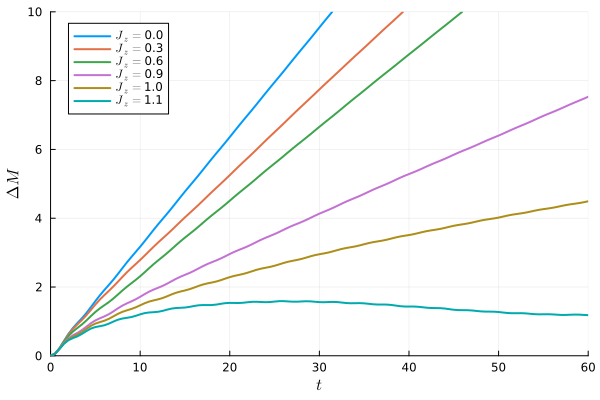

In [81]:
for i=1:length(Jz_list) 
    Jz = Jz_list[i]
    Expected_Values = readdlm("txt_files/Fig12_Expected_Values_Jz_"*string(Jz)*".txt")
    Times = readdlm("txt_files/Fig12_Times_Jz_"*string(Jz)*".txt")
    Magnetization = [sum(Expected_Values[:,i][101:end].+ 0.5) for i=1:141] 

    if i == 1
        plot(Times, Magnetization, label= L"J_{z} = "*string(Jz), linewidth=2, xlim = (0,60), ylim = (0,10))
    else
        plot!(Times, Magnetization, label= L"J_{z} = "*string(Jz), linewidth=2, xlim = (0,60), ylim = (0,10))
    end
end

ylabel!(L"\Delta M")
xlabel!(L"t")

**Figure 18:**

In [ ]:
function TEBD_Time_Evolution_Expected_Value_Sz_Dimerization(t, Psi_0, delta, Jz, site_inds)
    #|Ψ(t)> = exp(-itH)|Ψ(0)>

    N = length(Psi_0)

    maxdim = 20
    cutoff = 1E-11 #the cutoff value for truncating the density matrix eigenvalues. https://itensor.github.io/ITensors.jl/dev/ContractionSequenceOptimization.html#NDTensors.contract
    dt = 0.1
    
    s = site_inds
    
    # Make gates (1,2),(2,3),(3,4),...
    Evolution_Gates = ITensor[]    

    for j in 1:(N - 1)

        Jn = 1 + (-1)^(j)*delta
        
        s1 = s[j]
        s2 = s[j + 1]
        hj = Jn*Jz*op("Sz", s1)*op("Sz", s2) + Jn*op("Sx", s1)*op("Sx", s2) + Jn*op("Sy", s1)*op("Sy", s2)
        
    U = exp(-im * dt/ 2 * hj)
    push!(Evolution_Gates, U)
    end

    append!(Evolution_Gates, reverse(Evolution_Gates))

    Psi_t = Psi_0
    
    Expected_Values = zeros((N, trunc(Int, t/0.5) + 1)) #Each column contain the expected value of Sz for all sites for time = ncolum*(dt - 1)
    Expected_Values[:, 1] = expect(Psi_t,"Sz")    
    Times = [0.0]
    
    for time in dt:dt:t
        Psi_t = apply(Evolution_Gates, Psi_t; cutoff, maxdim)
        normalize!(Psi_t)

        if time % 0.5 == 0
            append!(Times, time)
            Expected_Values[:, trunc(Int, time/0.5 + 1)] = expect(Psi_t,"Sz")
        end
    end
    
    return Expected_Values, Times
    
end

In [75]:
N = 200

H_XX, sites = Create_MPO(N, 1, 0) #XX Model
Psi_0 = MPS(sites, n -> n <= N/2 ? "Up" : "Dn") #If  n <= N/2 then "Up", else "Dn"

Jz = 0
delta_list = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

6-element Vector{Float64}:
 0.0
 0.2
 0.4
 0.6
 0.8
 1.0

In [ ]:
T = 40 #

@time begin
@threads for i=1:min(nthreads(), length(delta_list)) #Multi-Threading
    delta = delta_list[i]
    Expected_Values, Times = TEBD_Time_Evolution_Expected_Value_Sz_Dimerization(T, Psi_0, delta, Jz, sites) 
    writedlm("txt_files/Fig18_Expected_Values_delta_"*string(delta)*".txt", Expected_Values)   
    writedlm("txt_files/Fig18_Times_delta_"*string(delta)*".txt", Times)   
end
end

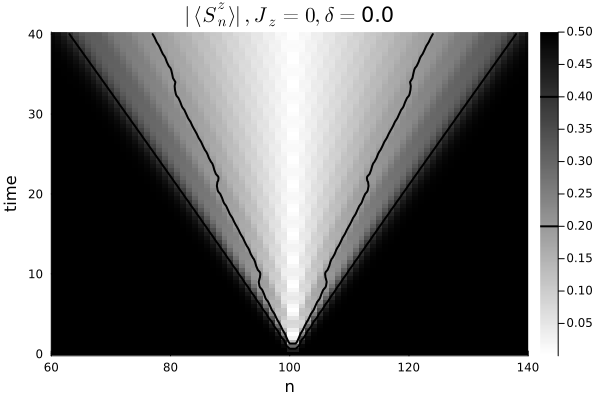

In [279]:
delta_value = delta_list[1]
Expected_Values = readdlm("txt_files/Fig18_Expected_Values_delta_"*string(delta_value)*".txt")

heatmap(1:N, 0.0:0.5:40, abs.(transpose(Expected_Values)), c=cgrad([:white, :black]), xlabel="n", ylabel="time", title= L"| \langle S^{z}_{n} \rangle |, J_{z} = 0, \delta ="*string(delta_value), xlim = (60,140)) #colorbar_title = L"| \langle S^{z}_{n} \rangle |"
contour!(1:N,  0.0:0.5:40, abs.(transpose(Expected_Values)), levels= [0.2,0.4], color = :black, linestyle = :solid, width = 2)

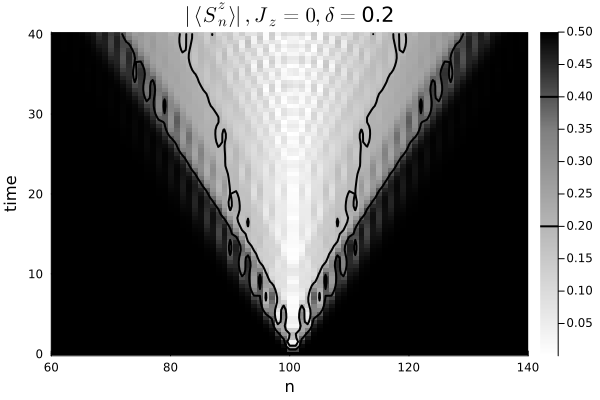

In [280]:
delta_value = delta_list[2]
Expected_Values = readdlm("txt_files/Fig18_Expected_Values_delta_"*string(delta_value)*".txt")

heatmap(1:N, 0.0:0.5:40, abs.(transpose(Expected_Values)), c=cgrad([:white, :black], [0, 0.7]), xlabel="n", ylabel="time", title= L"| \langle S^{z}_{n} \rangle |, J_{z} = 0, \delta ="*string(delta_value), xlim = (60,140)) #colorbar_title = L"| \langle S^{z}_{n} \rangle |"
contour!(1:N,  0.0:0.5:40, abs.(transpose(Expected_Values)), levels= [0.2,0.4], color = :black, linestyle = :solid, width = 2)

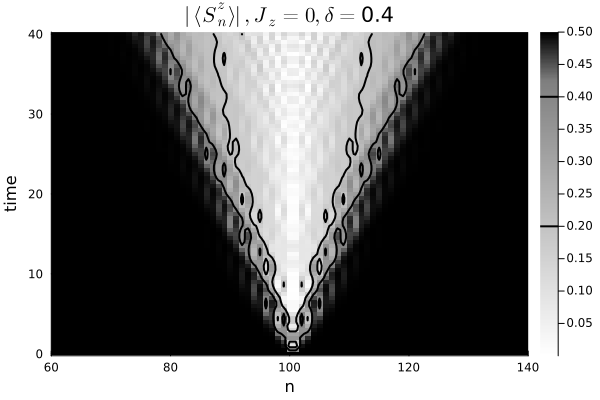

In [281]:
delta_value = delta_list[3]
Expected_Values = readdlm("txt_files/Fig18_Expected_Values_delta_"*string(delta_value)*".txt")

heatmap(1:N, 0.0:0.5:40, abs.(transpose(Expected_Values)), c=cgrad([:white, :black], [0, 0.85]), xlabel="n", ylabel="time", title= L"| \langle S^{z}_{n} \rangle |, J_{z} = 0, \delta ="*string(delta_value), xlim = (60,140)) #colorbar_title = L"| \langle S^{z}_{n} \rangle |"
contour!(1:N,  0.0:0.5:40, abs.(transpose(Expected_Values)), levels= [0.2,0.4], color = :black, linestyle = :solid, width = 2)

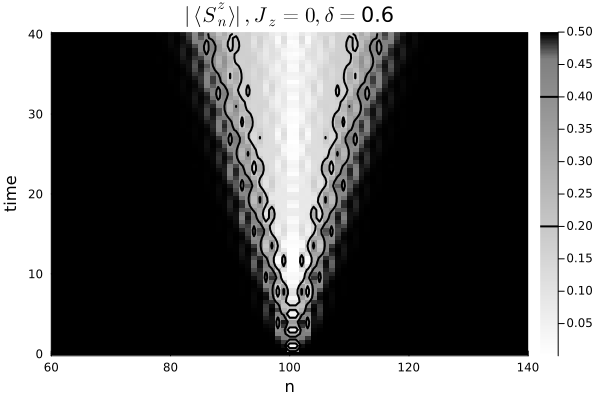

In [282]:
delta_value = delta_list[4]
Expected_Values = readdlm("txt_files/Fig18_Expected_Values_delta_"*string(delta_value)*".txt")

heatmap(1:N, 0.0:0.5:40, abs.(transpose(Expected_Values)), c=cgrad([:white, :black], [0, 0.92]), xlabel="n", ylabel="time", title= L"| \langle S^{z}_{n} \rangle |, J_{z} = 0, \delta ="*string(delta_value), xlim = (60,140)) #colorbar_title = L"| \langle S^{z}_{n} \rangle |"
contour!(1:N,  0.0:0.5:40, abs.(transpose(Expected_Values)), levels= [0.2,0.4], color = :black, linestyle = :solid, width = 2)

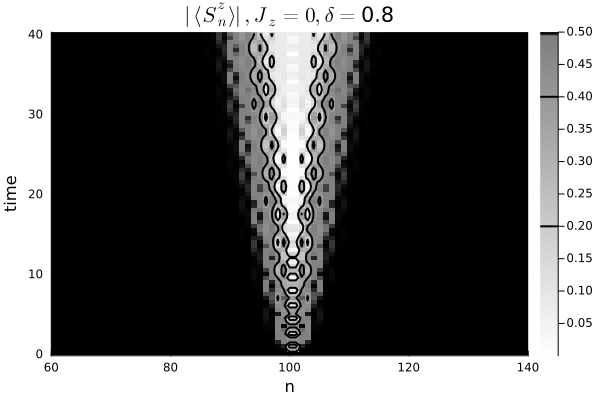

In [288]:
delta_value = delta_list[5]
Expected_Values = readdlm("txt_files/Fig18_Expected_Values_delta_"*string(delta_value)*".txt")

heatmap(1:N, 0.0:0.5:40, abs.(transpose(Expected_Values)), c=cgrad([:white, :black], [0, 0.99]), xlabel="n", ylabel="time", title= L"| \langle S^{z}_{n} \rangle |, J_{z} = 0, \delta ="*string(delta_value), xlim = (60,140)) #colorbar_title = L"| \langle S^{z}_{n} \rangle |"
contour!(1:N,  0.0:0.5:40, abs.(transpose(Expected_Values)), levels= [0.2,0.4], color = :black, linestyle = :solid, width = 2)

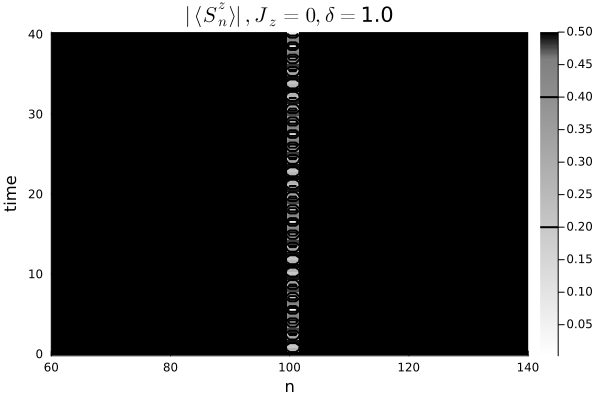

In [294]:
delta_value = delta_list[6]
Expected_Values = readdlm("txt_files/Fig18_Expected_Values_delta_"*string(delta_value)*".txt")

heatmap(1:N, 0.0:0.5:40, abs.(transpose(Expected_Values)), c=cgrad([:white, :black], [0, 0.92]), xlabel="n", ylabel="time", title= L"| \langle S^{z}_{n} \rangle |, J_{z} = 0, \delta ="*string(delta_value), xlim = (60,140)) #colorbar_title = L"| \langle S^{z}_{n} \rangle |"
contour!(1:N,  0.0:0.5:40, abs.(transpose(Expected_Values)), levels= [0.2,0.4], color = :black, linestyle = :solid, width = 2)

**Figure 19:**

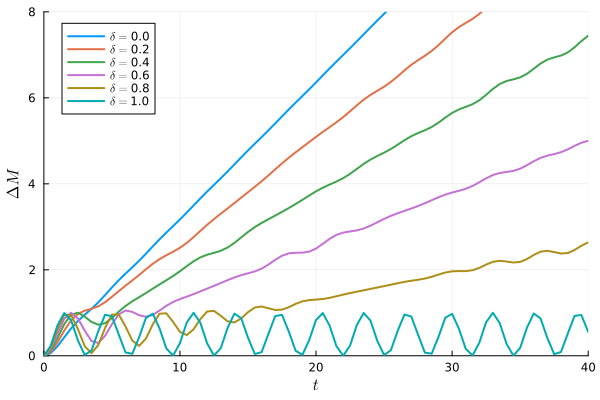

In [80]:
for i=1:length(delta_list) 
    delta = delta_list[i]
    Expected_Values = readdlm("txt_files/Fig18_Expected_Values_delta_"*string(delta)*".txt")
    Times = readdlm("txt_files/Fig18_Times_delta_"*string(delta)*".txt")
    Magnetization = [sum(Expected_Values[:,i][101:end].+ 0.5) for i=1:81] 

    if i == 1
        plot(Times, Magnetization, label= L"\delta = "*string(delta), linewidth=2, xlim = (0,40), ylim = (0,8))
    else
        plot!(Times, Magnetization, label= L"\delta = "*string(delta), linewidth=2, xlim = (0,40), ylim = (0,8))
    end
end

ylabel!(L"\Delta M")
xlabel!(L"t")